In [0]:
import tarfile
tf = tarfile.open("/content/drive/My Drive/tasks_1-20_v1-2.tar.gz")
tf.extractall(path ='/content/drive/My Drive' )

In [0]:
with open('/content/drive/My Drive/tasks_1-20_v1-2/en-10k/qa6_yes-no-questions_train.txt', 'r') as fp: train_lines = fp.read().splitlines()
with open('/content/drive/My Drive/tasks_1-20_v1-2/en-10k/qa6_yes-no-questions_test.txt', 'r') as fp: test_lines = fp.read().splitlines()

#Data Preprocssing

In [0]:
import re
#removing string control charachter train
for i in range(len(train_lines)):
  regex = re.compile(r'[\n\r\t]')
  regex1 = re.compile(r'[0123456789]')
  train_lines[i] = regex.sub(" ", train_lines[i])
  train_lines[i] = regex1.sub(" ", train_lines[i])

#removing string control charachter test
for i in range(len(test_lines)):
  regex = re.compile(r'[\n\r\t]')
  regex1 = re.compile(r'[0123456789]')
  test_lines[i] = regex.sub(" ", test_lines[i])
  test_lines[i] = regex1.sub(" ", test_lines[i])

In [0]:
#train
clines_train = []
for i in range(len(train_lines)):
  try:
    a = str.strip(train_lines[i+2].split('?')[0]) + ' ?'
    b = str.strip(train_lines[i+2].split('?')[1])
    c = str.strip(train_lines[i]) +" "+ str.strip(train_lines[i+1])
    clines_train.append(c)
    clines_train.append(a)
    clines_train.append(b)
  except:
    pass

#test
#train
clines_test = []
for i in range(len(test_lines)):
  try:
    a = str.strip(test_lines[i+2].split('?')[0]) + ' ?'
    b = str.strip(test_lines[i+2].split('?')[1])
    c = str.strip(test_lines[i]) +" "+ str.strip(test_lines[i+1])
    clines_test.append(c)
    clines_test.append(a)
    clines_test.append(b)
  except:
    pass

In [0]:
len(clines_train)

30000

In [0]:
#tokenizing training set using spacy
import spacy

nlp = spacy.load('en')

for i in range(len(clines_train)):
  clines_train[i] = list(nlp(clines_train[i]))

#tokenizing test set using spacy
import spacy

nlp = spacy.load('en')

for i in range(len(clines_test)):
  clines_test[i] = list(nlp(clines_test[i]))

In [0]:
#changing entries from token to text
for line in clines_test:
  for i in range(len(line)):
    line[i] = line[i].text

#changing entries from token to text
for line in clines_train:
  for i in range(len(line)):
    line[i] = line[i].text

In [0]:
#creating seperae list for story, question and answer in test

story_test = []
question_test = []
answer_test = []
i = 0
while i < len(clines_test):
  story_test.append(clines_test[i])
  question_test.append(clines_test[i+1])
  answer_test.append(clines_test[i+2])
  i = i+3

#creating seperae list for story, question and answer in train

story_train = []
question_train = []
answer_train = []
i = 0
while i < len(clines_train):
  story_train.append(clines_train[i])
  question_train.append(clines_train[i+1])
  answer_train.append(clines_train[i+2])
  i = i+3

In [0]:
story_test

[['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'discarded',
  'the',
  'milk',
  '.',
  'John',
  'went',
  'to',
  'the',
  'garden',
  '.'],
 ['Daniel',
  'moved',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'to',
  'the',
  'garden',
  '.'],
 ['Daniel',
  'travelled',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'travelled',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'took',
  'the',
  'football',
  'there',
  '.',
  'Sandra',
  'grabbed',
  'the',
  'milk',
  'there',
  '.'],
 ['Daniel',
  'went',
  'back',
  'to',
  'the',
  'kitchen',
  '.',
  'Mary',
  'grabbed',
  'the',
  'apple',
  'there',
  '.'],
 ['Daniel',
  'journeyed',
  'to',
  'the',
  'office',
  '.',
  'John',
  'went',
  'back',
  'to',
  'the',
  'office',
  '.'],
 ['Mary',
  'left',
  'the',
  'apple',
  '.',
  'Daniel',
  'went',
  'to',
  'the',
  'hallway',
  '.'],
 ['John',
  'went',
  'to',
  'the',

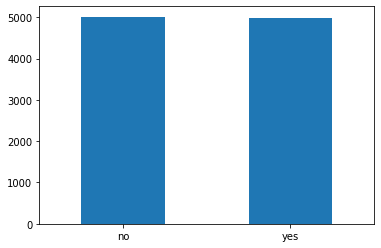

In [0]:
import matplotlib.pyplot as plt
answer_train1 = []
a = 0
b =0
for i in answer_train:
  if i[0] == 'yes':
    a = a+1
  else:
    b= b+1
answer_train1.append(a)
answer_train1.append(b)
import pandas as pd
a = pd.Series(answer_train1)
a.index = ['no','yes']
ax = a.plot.bar(x='', y='val', rot=0)

In [0]:
#changing everything to lowercase for train

for i in range(len(story_train)):
  for j in range(len(story_train[i])):
    story_train[i][j] = story_train[i][j].lower()

for i in range(len(question_train)):
  for j in range(len(question_train[i])):
    question_train[i][j] = question_train[i][j].lower()

#changing everything to lowercase for test

for i in range(len(story_test)):
  for j in range(len(story_test[i])):
    story_test[i][j] = story_test[i][j].lower()

for i in range(len(question_test)):
  for j in range(len(question_test[i])):
    question_test[i][j] = question_test[i][j].lower()

In [0]:
#modelling train data
for i in range(0,int(len(story_train)),5):
  story_train[i+1] = story_train[i]   + story_train[i+1]
  story_train[i+2] = story_train[i+1] + story_train[i+2]
  story_train[i+3] = story_train[i+2] + story_train[i+3]
  story_train[i+4] = story_train[i+3] + story_train[i+4]

#modelling test data
for i in range(0,int(len(story_test)),5):
  story_test[i+1] = story_test[i]   + story_test[i+1]
  story_test[i+2] = story_test[i+1] + story_test[i+2]
  story_test[i+3] = story_test[i+2] + story_test[i+3]
  story_test[i+4] = story_test[i+3] + story_test[i+4]

In [0]:
story_test

[['mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'john',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'john',
  'moved',
  'to',
  'the',
  'bedroom',
  '.',
  'mary',
  'discarded',
  'the',
  'milk',
  '.',
  'john',
  'went',
  'to',
  'the',
  'garden',
  '.'],
 ['mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'john',
  'moved',
  'to',
  'the',
  'bedroom',
  '.',
  'mary',
  'discarded',
  'the',
  'milk',
  '.',
  'john',
  'went',
  'to',
  'the',
  'garden',
  '.',
  'daniel',
  'moved',
  'to',
  'the',
  'bedroom',
  '.',
  'daniel',
  'went',
  'to',
  'the',
  'garden',
  '.'],
 ['mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'john',
  'moved',
  'to',
  'the',
  'bedroom',
  '.',
  'mary',
  'discarded',
  'the',
  'milk',
  '.',
  'john',
  'went',
  'to',
  'the',
  'garden',
  '.',
  'daniel',
  'moved',
  'to',
  'the',
  'bedroom',
  '.',
  'daniel',
  'went',
  'to',
  'the',
  '

In [0]:
#building a vocabulary
story1 = []

for i in story_test:
  for j in i:
    story1.append(j)

for i in story_train:
  for j in i:
    story1.append(j)

for i in question_train:
  for j in i:
    story1.append(j)

for i in question_test:
  for j in i:
    story1.append(j)
    
vocab = set(story1)

In [0]:
#length of vocab
len(vocab)

35

In [0]:
vocab.add('yes')
vocab.add('no')
#length of vacabulary
len(vocab)

37

In [0]:
#finding length of longest STORY
len_story = [len(i) for i in story_train]
longest_story = max(len_story)
longest_story

66

In [0]:
#finding length of longest question
len_quest = [len(i) for i in question_test]
longest_quest = max(len_quest)
longest_quest

6

#Vectorization

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
#Creating 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(vocab)
word_index = tokenizer.word_index

In [0]:
#changing story to seq for train
story_seq_train = tokenizer.texts_to_sequences(story_train)
#padding story seq for train
padded_story_seq_train = pad_sequences(story_seq_train,maxlen = longest_story,padding='post')
#changing quest to seq for train
question_seq_train = tokenizer.texts_to_sequences(question_train)
#padding question for train
padded_quest_seq_train = pad_sequences(question_seq_train,maxlen = longest_quest,padding='post')


#changing story to seq for TEST
story_seq_test = tokenizer.texts_to_sequences(story_test)
#padding story seq for TEST
padded_story_seq_test = pad_sequences(story_seq_test,maxlen = longest_story,padding='post')
#changing quest to seq for TEST
question_seq_test = tokenizer.texts_to_sequences(question_test)
#padding question for TEST
padded_quest_seq_test = pad_sequences(question_seq_test,maxlen = longest_quest,padding='post')

In [0]:
answer_train_token = tokenizer.texts_to_sequences(answer_train)
answer_test_token = tokenizer.texts_to_sequences(answer_test)

#Answer

In [0]:
vocab_size = len(vocab)+1
vocab_size

38

In [0]:
import numpy as np
Y_train = []
for i in answer_train_token:
  y = np.zeros(vocab_size)
  y[i] =1
  Y_train.append(y)

import numpy as np
Y_test = []
for i in answer_test_token:
  y = np.zeros(vocab_size)
  y[i] =1
  Y_test.append(y)

In [0]:
print(sum(Y_train))
print(sum(Y_test))

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0. 4988.    0.
    0.    0. 5012.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 503.   0.   0.   0.
 497.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]


#model creation


In [0]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [0]:
vocab_size = len(vocab)+1
vocab_size

38

#inpunt encoder m

In [0]:
input_encoder = Sequential()
input_encoder.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)

![alt text](https://braincreators.com/wp-content/uploads/2018/06/memnet-768x438.png)

#inpunt encoder c

In [0]:
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=longest_quest))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

### Question Encoder

In [0]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=longest_quest))
question_encoder.add(Dropout(0.5))
# output: (samples, query_maxlen, embedding_dim)

In [0]:
input_sequence = Input((longest_story,))
question = Input((longest_quest,))

In [0]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [0]:
# shape: `(samples, story_maxlen, query_maxlen)`
p = dot([input_encoded_m, question_encoded], axes=(2,2))
p = Activation('softmax')(p)

In [0]:
# add the match matrix with the second input vector sequence
response = add([p, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

In [0]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

In [0]:
answer = LSTM(32)(answer)

In [0]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  

In [0]:
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 66)           0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_12 (Sequential)      multiple             2432        input_5[0][0]                    
__________________________________________________________________________________________________
sequential_16 (Sequential)      (None, 6, 64)        2432        input_6[0][0]                    
____________________________________________________________________________________________

In [0]:
# train
history = model.fit([padded_story_seq_train,padded_quest_seq_train], np.array(Y_train),batch_size=32,epochs=150,validation_data=([padded_story_seq_test,padded_quest_seq_test], np.array(Y_test)))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10000 samples, validate on 1000 samples
Epoch 1/150
10000/10000 [==============================] - 3s 350us/step - loss: 0.9214 - accuracy: 0.4946 - val_loss: 0.6974 - val_accuracy: 0.4970
Epoch 2/150
10000/10000 [==============================] - 3s 300us/step - loss: 0.7021 - accuracy: 0.4931 - val_loss: 0.6934 - val_accuracy: 0.4970
Epoch 3/150
10000/10000 [==============================] - 3s 291us/step - loss: 0.6961 - accuracy: 0.4976 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 4/150
10000/10000 [==============================] - 3s 315us/step - loss: 0.6951 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 5/150
10000/10000 [==============================] - 3s 303us/step - loss: 0.6948 - accuracy: 0.4926 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 6/150
10000/10000 [==============================] - 3s 297us/step - loss: 0.6948 - accuracy: 0.4988 - val_loss: 0.6939 - val_accuracy: 0.5030
Epoch 7/150
10000/10000 [==============================] 

In [0]:
import joblib
joblib.dump(history, 'model.pkl')
print("Model dumped!")

Model dumped!


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


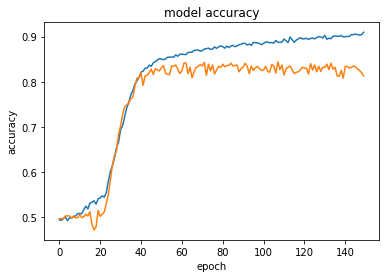

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

## Writing Your Own Stories and Questions

Remember you can only use words from the existing vocab

In [0]:
vocab

{'.',
 '?',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'daniel',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'is',
 'john',
 'journeyed',
 'kitchen',
 'left',
 'mary',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'sandra',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [0]:
my_story = "john left the garden . mary took the football there . "

In [0]:
my_question = "is mary in the garden ?"

In [0]:
def Vecotorize(story,question):
  story = [story,story]
  question = [question,question]
  my_story_seq = tokenizer.texts_to_sequences(story)
  padded_seq_s = pad_sequences(my_story_seq,maxlen=longest_story,padding= 'post')
  my_quest_seq = tokenizer.texts_to_sequences(question)
  padded_seq_q = pad_sequences(my_quest_seq,maxlen=longest_quest,padding= 'post')
  return padded_seq_s, padded_seq_q

In [0]:
my_story ,my_question = Vecotorize(my_story,my_question)

In [0]:
def prediction(vectorized_story, vectorized_question):
  prediction = model.predict([vectorized_story, vectorized_question])[0]
  val_max = np.argmax(prediction)
  for key, val in tokenizer.word_index.items():
    if val == val_max:
      k = key
  return k
  #Generate prediction from model


In [0]:
prediction(my_story,my_question)

'no'